In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_start=pd.read_csv('winequality-red_miss-COPY.csv')
print(f"Missing values in each attributes: \n\n{data_start.isnull().sum()}")
print(f"\n\n Total number of missing values in the file: {data_start.isnull().sum().sum()}")
print(data_start)

Missing values in each attributes: 

fixed acidity           22
volatile acidity         5
citric acid             22
residual sugar          20
chlorides                8
free sulfur dioxide      6
total sulfur dioxide     5
density                  1
pH                       4
sulphates                7
alcohol                  1
quality                 18
dtype: int64


 Total number of missing values in the file: 119
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700          NaN             1.9      0.076   
1               7.8             0.880         0.00             NaN      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280          NaN             1.9      0.075   
4              77.4            10.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594    

In [134]:
data_start_copy=data_start.copy()
# print(data_start_copy)
data_start_copy.loc[data_start_copy['fixed acidity'].first_valid_index(), 'fixed acidity'] = None
data_start_copy.loc[data_start_copy['fixed acidity'].last_valid_index(), 'fixed acidity'] = None

data_start_copy.loc[data_start_copy['volatile acidity'][4], 'volatile acidity'] = "N/A"
data_start_copy.loc[data_start_copy['volatile acidity'][3], 'volatile acidity'] = "N/A"

# data_start_copy.replace(data_start_copy.iloc[2].iloc[1], "N/A", inplace=True)
# data_start_copy.replace(data_start_copy.iloc[3].iloc[1], "N/A", inplace=True)
print(data_start_copy)

print("For new data after manipulation: \n\n")
print(f"Missing values in each attributes: \n\n{data_start_copy.isnull().sum()}")
print(f"\n\n Total number of missing values in the file: {data_start_copy.isnull().sum().sum()}")

         fixed acidity volatile acidity  citric acid  residual sugar  \
0.00               NaN              0.7          NaN             1.9   
1.00               7.8             0.88         0.00             NaN   
2.00               7.8             0.76         0.04             2.3   
3.00              11.2             0.28          NaN             1.9   
4.00              77.4             10.7         0.00             1.9   
...                ...              ...          ...             ...   
1596.00            6.3             0.51         0.13             2.3   
1597.00            5.9            0.645         0.12             2.0   
1598.00            NaN             0.31         0.47             3.6   
10.70              NaN              N/A          NaN             NaN   
0.28               NaN              N/A          NaN             NaN   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0.00         0.076                 11.0                

In [135]:
data_start_copy.loc[data_start_copy['volatile acidity'][5], 'volatile acidity'] = "na"
data_start_copy.loc[data_start_copy['volatile acidity'][7], 'volatile acidity'] = "na"
data_start_copy.replace("na",pd.NA)
print(data_start_copy)


print("For new data after new manipulation: \n\n")
print(f"Missing values in each attributes: \n\n{data_start_copy.isnull().sum()}")
print(f"\n\n Total number of missing values in the file: {data_start_copy.isnull().sum().sum()}")


data_start_copy.to_csv('winequality-red miss-modified.csv')

         fixed acidity volatile acidity  citric acid  residual sugar  \
0.00               NaN              0.7          NaN             1.9   
1.00               7.8             0.88         0.00             NaN   
2.00               7.8             0.76         0.04             2.3   
3.00              11.2             0.28          NaN             1.9   
4.00              77.4             10.7         0.00             1.9   
...                ...              ...          ...             ...   
1598.00            NaN             0.31         0.47             3.6   
10.70              NaN              N/A          NaN             NaN   
0.28               NaN              N/A          NaN             NaN   
0.66               NaN               na          NaN             NaN   
0.65               NaN               na          NaN             NaN   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0.00         0.076                 11.0                

The number of tuples having missing values: 
0    1528
1      58
2       4
3       1
4       1
5       2
6       1
7       2
8       2
Name: count, dtype: int64


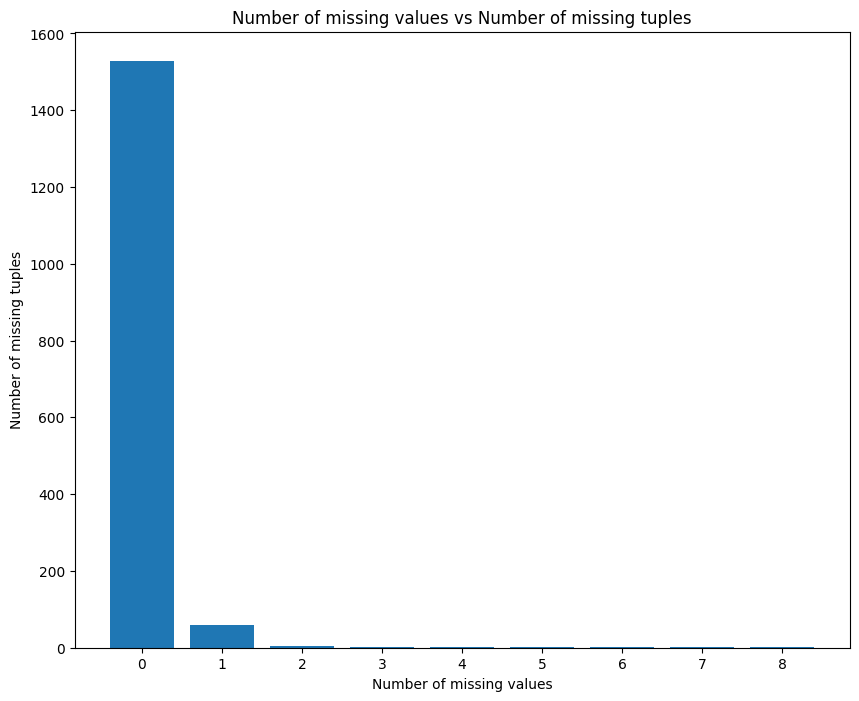

In [66]:
data_miss = pd.read_csv('winequality-red_miss.csv')
missing_count = data_miss.isnull().sum(axis=1)
missing_value_display = missing_count.value_counts().sort_index()
print(f"The number of tuples having missing values: \n{missing_value_display}")

plt.figure(figsize=(10,8))
plt.bar(missing_value_display.index,missing_value_display.values)
plt.xlabel("Number of missing values")
plt.ylabel("Number of missing tuples")
plt.title("Number of missing values vs Number of missing tuples")
plt.xticks(range(missing_value_display.index.min(), missing_value_display.index.max() + 1))
plt.show()

In [77]:
threshold = len(data_miss.columns)/2
tupples_with_more_missing = (missing_count >=threshold).sum()
print(f"Number of tuples with >=50% attributes with missing values: {tupples_with_more_missing}")

Number of tuples with >=50% attributes with missing values: 5


In [79]:
data_dropped = data_miss[missing_count < threshold]
print(data_dropped)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700          NaN             1.9      0.076   
1               7.8             0.880         0.00             NaN      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280          NaN             1.9      0.075   
4              77.4            10.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [81]:
data_dropped_modified= data_dropped.dropna(subset=['quality'])
print(data_dropped_modified)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700          NaN             1.9      0.076   
1               7.8             0.880         0.00             NaN      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280          NaN             1.9      0.075   
4              77.4            10.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [83]:
data_dropped.to_csv('winequality-red cleaned.csv')
data_dropped_modified.to_csv('winequality-red target cleaned.csv')

In [136]:
print(data_dropped_modified.isnull().sum())
print(f"total number of missing values in the file: {data_dropped_modified.isnull().sum().sum()}")

fixed acidity           16
volatile acidity         2
citric acid             19
residual sugar          15
chlorides                4
free sulfur dioxide      1
total sulfur dioxide     0
density                  0
pH                       0
sulphates                2
alcohol                  0
quality                  0
dtype: int64
total number of missing values in the file: 59


In [90]:
numeric_columns = data_dropped_modified.select_dtypes(include=['number']).columns
medians = data_dropped_modified[numeric_columns].median()
data_median = data_dropped_modified.copy()
data_median[numeric_columns] = data_median[numeric_columns].fillna(medians)

print(data_median)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.26             1.9      0.076   
1               7.8             0.880         0.00             2.2      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.26             1.9      0.075   
4              77.4            10.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [140]:
data_original = pd.read_csv('winequality_red_original.csv')
original_stats = data_original.describe().transpose()
original_stats['Mode'] = data_original.mode().iloc[0]

median_stats = data_median.describe().transpose()
median_stats['Mode'] = data_median.mode().iloc[0]

compar_orig = original_stats[['mean','50%','Mode','std']].copy()
compar_orig.columns = ['Original Mean', 'Original Median', 'Original Mode', 'Original Standard Deviation']

compar_new = median_stats[['mean','50%','Mode','std']].copy()
compar_new.columns = ['New Mean', 'New Median', 'New Mode', 'New Standard Deviation']

comparison = pd.concat([compar_orig, compar_new], axis=1)

print("Comparison of Statistics Between Original and Processed Dataset:")
print(comparison)

Comparison of Statistics Between Original and Processed Dataset:
                      Original Mean  Original Median  Original Mode  \
fixed_acidity              8.319637          7.90000         7.2000   
volatile_acidity           0.527821          0.52000         0.6000   
citric_acid                0.270976          0.26000         0.0000   
residual_sugar             2.538806          2.20000         2.0000   
chlorides                  0.087467          0.07900         0.0800   
free_sulfur_dioxide       15.874922         14.00000         6.0000   
total_sulfur_dioxide      46.467792         38.00000        28.0000   
density                    0.996747          0.99675         0.9972   
pH                         3.311113          3.31000         3.3000   
sulphates                  0.658149          0.62000         0.6000   
alcohol                   10.422983         10.20000         9.5000   
quality                    5.636023          6.00000         5.0000   

           

In [120]:
common_columns = data_original.columns.intersection(data_median.columns)
data_original = data_original[common_columns]
data_median = data_median[common_columns]

common_indices = data_original.index.intersection(data_median.index)
data_original = data_original.loc[common_indices]
data_median = data_median.loc[common_indices]


rmse ={}
for column in data_original.columns:
    original_values = data_original[column].values
    processed_values = data_median[column].values
    rmse1 = np.sqrt(np.mean((original_values - processed_values) ** 2))
    rmse[column] = rmse1

print("Root Mean Square Error (RMSE) for each attribute:")
for attr, rmse1 in rmse.items():
    print(f"{attr}: {rmse1:.4f}")

Root Mean Square Error (RMSE) for each attribute:
chlorides: 0.0010
density: 0.0000
pH: 0.0000
sulphates: 0.0082
alcohol: 0.0000
quality: 0.0000


In [124]:
rmse_percentage ={}
for col in data_original.columns:
    if data_original[col].dtype in ['float64', 'int64']:
        original_values = data_original[col].values
        processed_values = data_median[col].values
        rmse = np.sqrt(np.mean((original_values - processed_values) ** 2))
        mean_val = np.mean(np.abs(original_values))
        if mean_val != 0:
            rmse_percent = (rmse/mean_val) *100
        else:
            rmse_percent = 0
        rmse_percentage[col] = rmse_percent

print("Root Mean Square Error (RMSE) as percentage of mean for each attribute:")
for attr, rmse_percent in rmse_percentage.items():
    print(f"{attr}: {rmse_percent:.4f}")

Root Mean Square Error (RMSE) as percentage of mean for each attribute:
chlorides: 1.1449
density: 0.0000
pH: 0.0000
sulphates: 1.2466
alcohol: 0.0000
quality: 0.0000


In [126]:
data_miss_filling = data_miss.fillna(method='ffill')

print("DataFrame after forward filling missing values:")
print(data_miss_filling)

DataFrame after forward filling missing values:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700          NaN             1.9      0.076   
1               7.8             0.880         0.00             1.9      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.04             1.9      0.075   
4              77.4            10.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47           

In [127]:
data_interpolated = data_miss.interpolate(method='linear', axis=0)
print("DataFrame after linear interpolation:")
print(data_interpolated)

DataFrame after linear interpolation:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700          NaN             1.9      0.076   
1               7.8             0.880         0.00             2.1      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.02             1.9      0.075   
4              77.4            10.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6     